<h2> Importing necessary Libraries and importing dataset:- </h2>

In [10]:
#imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.sparse import hstack
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import datetime as dt

features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login', 'is_guest_login', 'count', 'srv_count','serror_rate','srv_serror_rate','rerror_rate',
'srv_rerror_rate', 'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','intrusion_type']

data = pd.read_csv('kddcup.data_10_percent_corrected', names=features, header=None)
data.head()
print('The nbr of data points are:',data.shape[0])
print('The nbr of features are:',data.shape[1])
output = data['intrusion_type'].values
labels = set(output)
print('The labels are:',labels)
print('There are:', len(labels),' labels.')


The nbr of data points are: 494021
The nbr of features are: 42
The labels are: {'smurf.', 'imap.', 'phf.', 'multihop.', 'spy.', 'loadmodule.', 'neptune.', 'normal.', 'guess_passwd.', 'land.', 'portsweep.', 'buffer_overflow.', 'rootkit.', 'back.', 'warezclient.', 'nmap.', 'perl.', 'ipsweep.', 'teardrop.', 'pod.', 'ftp_write.', 'warezmaster.', 'satan.'}
There are: 23  labels.


<h2> Defining functions to use them frequently </h2>

In [11]:
#Defining Functions to use them frequently
def confusion_matrix_function(Y_test, y_test_pred):

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
def model(model_name, X_train, Y_train, X_test, Y_test):


def model_grid_attributes_print(model):
    
    print('Best estimator: \n\t{}\n'.format(model.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))

    
def tpr_fpr_function(Y_train, Y_pred):

    results = dict()
    Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_train[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    return results
       

IndentationError: expected an indented block (<ipython-input-11-21f494eb5355>, line 19)

<h2> Data Cleaning:</h2>

In [12]:
#Checking for NULL values
print('Null values in the dataset are: ',len(data[data.isnull().any(1)]))

#Checking for DUPLICATE values
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF.head(5)
                       
    
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape
print(data)

Null values in the dataset are:  0
        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \


<h2> Exploratory Data Analysis:</h2>

<h6> Distribution of categories in class label: </h6>

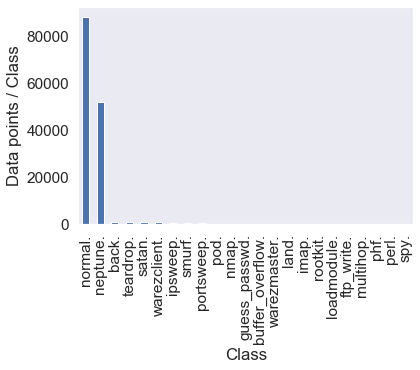

Class 1 : 87832 number of data points ( 60.33 %)
Class 2 : 51820 number of data points ( 35.594 %)
Class 3 : 968 number of data points ( 0.665 %)
Class 4 : 918 number of data points ( 0.631 %)
Class 5 : 906 number of data points ( 0.622 %)
Class 6 : 893 number of data points ( 0.613 %)
Class 7 : 651 number of data points ( 0.447 %)
Class 8 : 641 number of data points ( 0.44 %)
Class 9 : 416 number of data points ( 0.286 %)
Class 10 : 206 number of data points ( 0.141 %)
Class 11 : 158 number of data points ( 0.109 %)
Class 12 : 53 number of data points ( 0.036 %)
Class 13 : 30 number of data points ( 0.021 %)
Class 14 : 20 number of data points ( 0.014 %)
Class 15 : 19 number of data points ( 0.013 %)
Class 16 : 12 number of data points ( 0.008 %)
Class 17 : 10 number of data points ( 0.007 %)
Class 18 : 9 number of data points ( 0.006 %)
Class 19 : 8 number of data points ( 0.005 %)
Class 20 : 7 number of data points ( 0.005 %)
Class 21 : 4 number of data points ( 0.003 %)
Class 22 : 

In [13]:
plt.figure()
labels = data['intrusion_type'].value_counts()
labels.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points / Class')
plt.grid()
plt.show()


sorted_labels = np.argsort(-labels.values)
for i in sorted_labels:
    print('Class', i+1, ':',labels.values[i], 'number of data points (', np.round((labels.values[i]/data.shape[0]*100), 3), '%)')
normal_percentage = np.round((labels.values[0]/data.shape[0]*100), 3)
print('Normal: ',normal_percentage,'%')
print('Intrusions: ',100 - normal_percentage,'%')

In [14]:
df = data.drop(['intrusion_type','protocol_type','service','flag'], axis=1)
Y = data['intrusion_type'].values

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'],  test_size=0.25)

print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('\nTest data')
print(X_test.shape)
print(Y_test.shape)


Train data
(109189, 41)
(109189,)

Test data
(36397, 41)
(36397,)


<h2> Vectorizing Categorical features using one-hot encoding:- </h2>

In [15]:
#Protocol_type
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)


one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)
print(train_protocol[1].toarray())
train_protocol.shape

service = list(X_train['service'].values)
service = list(set(service))
print('\nService types are:\n', service)

#Service
print("Service:")
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)
print(train_service)
train_service.shape

#Flag

flag = list(X_train['flag'].values)
flag = list(set(flag))

one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)


X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

Protocol types are: ['tcp', 'icmp', 'udp']
[[1 0 0]]

Service types are:
 ['domain', 'daytime', 'sql_net', 'ctf', 'domain_u', 'login', 'netbios_dgm', 'name', 'private', 'imap4', 'exec', 'sunrpc', 'supdup', 'shell', 'gopher', 'discard', 'kshell', 'netstat', 'whois', 'X11', 'pop_3', 'csnet_ns', 'ssh', 'eco_i', 'rje', 'finger', 'systat', 'remote_job', 'mtp', 'http_443', 'auth', 'netbios_ns', 'smtp', 'bgp', 'ldap', 'courier', 'nntp', 'tim_i', 'tftp_u', 'nnsp', 'telnet', 'printer', 'iso_tsap', 'urp_i', 'other', 'Z39_50', 'ftp', 'IRC', 'vmnet', 'http', 'pm_dump', 'uucp', 'link', 'urh_i', 'echo', 'pop_2', 'time', 'hostnames', 'uucp_path', 'klogin', 'ecr_i', 'ntp_u', 'ftp_data', 'netbios_ssn', 'efs']
Service:
  (0, 4)	1
  (1, 49)	1
  (2, 62)	1
  (3, 33)	1
  (4, 43)	1
  (5, 8)	1
  (6, 49)	1
  (7, 30)	1
  (8, 44)	1
  (9, 49)	1
  (10, 8)	1
  (11, 8)	1
  (12, 32)	1
  (13, 49)	1
  (14, 49)	1
  (15, 4)	1
  (16, 49)	1
  (17, 4)	1
  (18, 49)	1
  (19, 49)	1
  (20, 49)	1
  (21, 8)	1
  (22, 8)	1
  (23, 4

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

<h2> Logistic regression without Regularization</h2>

Prediction on training data:
Completed

Time taken to execute: 0:00:28.026410
Prediction on test data:
Completed
Time taken: 0:00:00.010272
Performance metrics:
Confusion Matrix is:


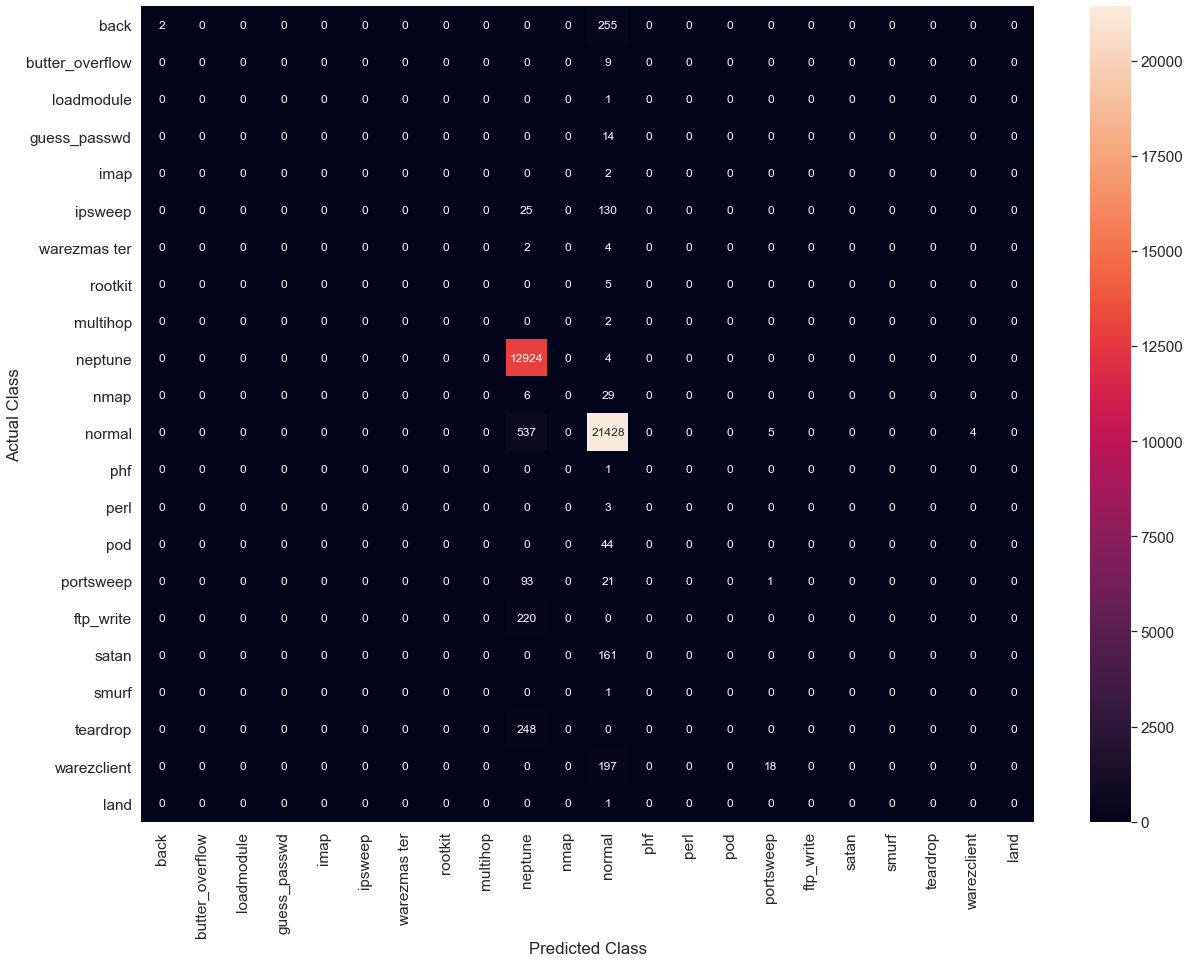





Precision score is:
0.9136157492587361




Recall score is:
0.943896474984202




F1-score is:
0.9246444380550484


In [43]:
    lr = LogisticRegression(random_state = 0)
    # logisticRegression_train, logisticRegression_test =  model(classifier, X_train, Y_train, X_test, Y_test)

    print('Prediction on training data:')
    start_time = dt.datetime.now()
    lr.fit(X_train, Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = lr.predict(X_train)    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = lr.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    logisticRegression_train = results_train
    logisticRegression_test = results_test

<h2>SVM with GridSearchCV without Feature Scaling</h2>

In [ ]:
    hyperparameter = {'alpha':[10**x for x in range(-8,4)], 'penalty':['l1', 'l2']}
    svm = SGDClassifier(loss='hinge')
    SVM_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)



    print('Prediction on training data:')
    start_time = dt.datetime.now()
    SVM_grid.fit(X_train, Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = SVM_grid.predict(X_train)    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = SVM_grid.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')



#     SVM_grid_results_train, SVM_grid_results_test = model(classifier, X_train, Y_train, X_test, Y_test)

Prediction on training data:
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min


In [ ]:
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    SVM_grid_results_train = results_train
    SVM_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(SVM_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(SVM_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(SVM_grid.n_splits_))


    SVM_gs = SVM_grid.best_estimator_
    y_tr_pred = SVM_gs.predict(X_train)
    y_test_pred = SVM_gs.predict(X_test)
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

<h2>Random Forest with GridSearchCV without feature scaling</h2>

Prediction on training data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished


Completed

Time taken to execute: 0:13:27.259383
Prediction on test data:
Completed
Time taken: 0:00:00.679723
Performance metrics:
Confusion Matrix is:


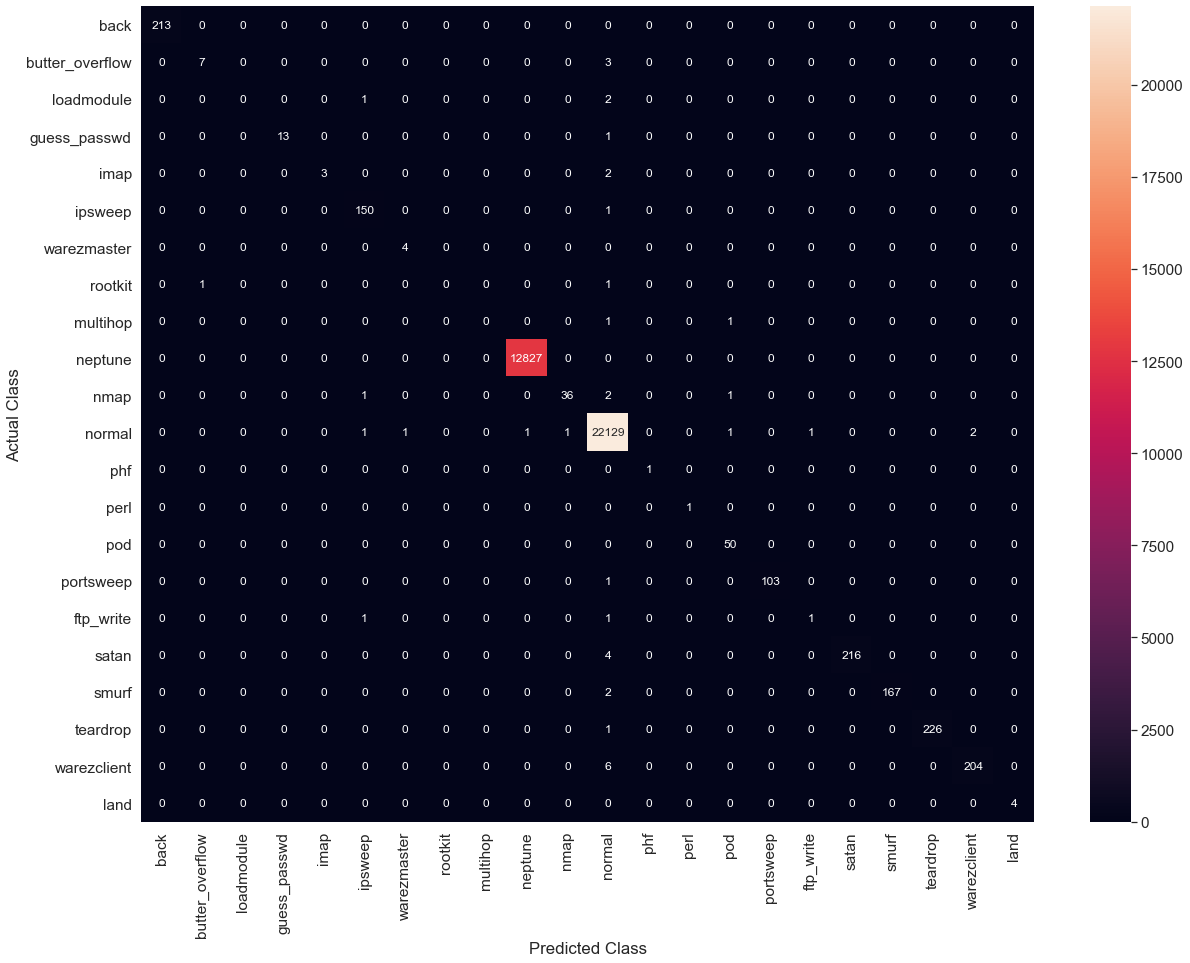





Precision score is:
0.9986428323625667




Recall score is:
0.998846058741105




F1-score is:
0.9987273005178389
Best estimator: 
	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 10, 'n_estimators': 100}


	Total number of cross validation sets: 3

{'precision': 0.9998958491485642, 'recall': 0.9998900988194781, 'f1_score': 0.9998916571580341}
{'tp': 65685, 'tpr': 0.9998477814141107, 'fp': 0, 'fpr': 0.0}
{'preci

In [60]:
    hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}
    RandomForest = RandomForestClassifier(criterion='gini',class_weight='balanced')
    RF_grid = GridSearchCV(RandomForest, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

    print('Prediction on training data:')
    start_time = dt.datetime.now()
    RF_grid.fit(X_train, Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = RF_grid.predict(X_train)    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = RF_grid.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')


    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    RF_grid_results_tr = results_train
    RF_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(RF_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(RF_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(RF_grid.n_splits_))


    RF_gs = RF_grid.best_estimator_
    y_tr_pred = RF_gs.predict(X_train_1.toarray())
    y_test_pred = RF_gs.predict(X_test_1.toarray())
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

<h2>Decision Tree with GridSearchCV without feature scaling</h2>

In [37]:
    hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
    decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs =-1)



    print('Prediction on training data:')
    start_time = dt.datetime.now()
    decision_tree_grid.fit(X_train, Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = decision_tree_grid.predict(X_train)    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = decision_tree_grid.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    DT_grid_results_tr = results_train
    DT_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(decision_tree_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(decision_tree_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(decision_tree_grid.n_splits_))


    DT_gs = decision_tree_grid.best_estimator_
    y_tr_pred = DT_gs.predict(X_train)
    y_test_pred = DT_gs.predict(X_test)
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

Prediction on training data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   16.9s finished


Completed

Time taken to execute: 0:00:17.858810
Prediction on test data:
Completed
Time taken: 0:00:00.013100
Performance metrics:
Confusion Matrix is:


<h2> Feature Scaling: applying standardisation on the continuous features</h2>

In [16]:

scaler = StandardScaler()
duration1 = scaler.fit_transform(X_train['duration'].values.reshape(-1,1))
duration2 = scaler.transform(X_test['duration'].values.reshape(-1,1))

#src_bytes
src_bytes1 = scaler.fit_transform(X_train['src_bytes'].values.reshape(-1,1))
src_bytes2 = scaler.transform(X_test['src_bytes'].values.reshape(-1,1))

#dst_bytes
dst_bytes1 = scaler.fit_transform(X_train['dst_bytes'].values.reshape(-1,1))
dst_bytes2 = scaler.transform(X_test['dst_bytes'].values.reshape(-1,1))


land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])


#wrong_fragment
wrong_fragment1 = scaler.fit_transform(X_train['wrong_fragment'].values.reshape(-1,1))
wrong_fragment2 = scaler.transform(X_test['wrong_fragment'].values.reshape(-1,1))


#urgent
urgent1 = scaler.fit_transform(X_train['urgent'].values.reshape(-1,1))
urgent2 = scaler.transform(X_test['urgent'].values.reshape(-1,1))


#hot
hot1 = scaler.fit_transform(X_train['hot'].values.reshape(-1,1))
hot2 = scaler.transform(X_test['hot'].values.reshape(-1,1))


#num_failed_logins
num_failed_logins1 = scaler.fit_transform(X_train['num_failed_logins'].values.reshape(-1,1))
num_failed_logins2 = scaler.transform(X_test['num_failed_logins'].values.reshape(-1,1))

logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])

#num_compromised
num_compromised1 = scaler.fit_transform(X_train['num_compromised'].values.reshape(-1,1))
num_compromised2 = scaler.transform(X_test['num_compromised'].values.reshape(-1,1))


#root_shell
root_shell1 = scaler.fit_transform(X_train['root_shell'].values.reshape(-1,1))
root_shell2 = scaler.transform(X_test['root_shell'].values.reshape(-1,1))


#su_attempted
su_attempted1 = scaler.fit_transform(X_train['su_attempted'].values.reshape(-1,1))
su_attempted2 = scaler.transform(X_test['su_attempted'].values.reshape(-1,1))

#num_root
num_root1 = scaler.fit_transform(X_train['num_root'].values.reshape(-1,1))
num_root2 = scaler.transform(X_test['num_root'].values.reshape(-1,1))

#num_file_creations
num_file_creations1 = scaler.fit_transform(X_train['num_file_creations'].values.reshape(-1,1))
num_file_creations2 = scaler.transform(X_test['num_file_creations'].values.reshape(-1,1))



#num_shells
num_shells1 = scaler.fit_transform(X_train['num_shells'].values.reshape(-1,1))
num_shells2 = scaler.transform(X_test['num_shells'].values.reshape(-1,1))

#num_access_files
num_access_files1 = scaler.fit_transform(X_train['num_access_files'].values.reshape(-1,1))
num_access_files2 = scaler.transform(X_test['num_access_files'].values.reshape(-1,1))


#num_outbound_cmds
num_outbound_cmds1 = scaler.fit_transform(X_train['num_outbound_cmds'].values.reshape(-1,1))
num_outbound_cmds2 = scaler.transform(X_test['num_outbound_cmds'].values.reshape(-1,1))


is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])

is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])


#srv_count
srv_count1 = scaler.fit_transform(X_train['srv_count'].values.reshape(-1,1))
srv_count2 = scaler.transform(X_test['srv_count'].values.reshape(-1,1))

#serror_rate
serror_rate1 = scaler.fit_transform(X_train['serror_rate'].values.reshape(-1,1))
serror_rate2 = scaler.transform(X_test['serror_rate'].values.reshape(-1,1))


#srv_serror_rate
srv_serror_rate1 = scaler.fit_transform(X_train['srv_serror_rate'].values.reshape(-1,1))
srv_serror_rate2 = scaler.transform(X_test['srv_serror_rate'].values.reshape(-1,1))

#rerror_rate
rerror_rate1 = scaler.fit_transform(X_train['rerror_rate'].values.reshape(-1,1))
rerror_rate2 = scaler.transform(X_test['rerror_rate'].values.reshape(-1,1))

#srv_rerror_rate
srv_rerror_rate1 = scaler.fit_transform(X_train['srv_rerror_rate'].values.reshape(-1,1))
srv_rerror_rate2 = scaler.transform(X_test['srv_rerror_rate'].values.reshape(-1,1))
print(srv_rerror_rate1[1])

#same_srv_rate
same_srv_rate1 = scaler.fit_transform(X_train['same_srv_rate'].values.reshape(-1,1))
same_srv_rate2 = scaler.transform(X_test['same_srv_rate'].values.reshape(-1,1))


#diff_srv_rate
diff_srv_rate1 = scaler.fit_transform(X_train['diff_srv_rate'].values.reshape(-1,1))
diff_srv_rate2 = scaler.transform(X_test['diff_srv_rate'].values.reshape(-1,1))

#srv_diff_host_rate
srv_diff_host_rate1 = scaler.fit_transform(X_train['srv_diff_host_rate'].values.reshape(-1,1))
srv_diff_host_rate2 = scaler.transform(X_test['srv_diff_host_rate'].values.reshape(-1,1))

#dst_host_count
dst_host_count1 = scaler.fit_transform(X_train['dst_host_count'].values.reshape(-1,1))
dst_host_count2 = scaler.transform(X_test['dst_host_count'].values.reshape(-1,1))

#dst_host_srv_count
dst_host_srv_count1 = scaler.fit_transform(X_train['dst_host_srv_count'].values.reshape(-1,1))
dst_host_srv_count2 = scaler.transform(X_test['dst_host_srv_count'].values.reshape(-1,1))

#dst_host_same_srv_rate
dst_host_same_srv_rate1 = scaler.fit_transform(X_train['dst_host_same_srv_rate'].values.reshape(-1,1))
dst_host_same_srv_rate2 = scaler.transform(X_test['dst_host_same_srv_rate'].values.reshape(-1,1))

#dst_host_diff_srv_rate
dst_host_diff_srv_rate1 = scaler.fit_transform(X_train['dst_host_diff_srv_rate'].values.reshape(-1,1))
dst_host_diff_srv_rate2 = scaler.transform(X_test['dst_host_diff_srv_rate'].values.reshape(-1,1))

#dst_host_same_src_port_rate
dst_host_same_src_port_rate1 = scaler.fit_transform(X_train['dst_host_same_src_port_rate'].values.reshape(-1,1))
dst_host_same_src_port_rate2 = scaler.transform(X_test['dst_host_same_src_port_rate'].values.reshape(-1,1))

#dst_host_srv_diff_host_rate
dst_host_srv_diff_host_rate1 = scaler.fit_transform(X_train['dst_host_srv_diff_host_rate'].values.reshape(-1,1))
dst_host_srv_diff_host_rate2 = scaler.transform(X_test['dst_host_srv_diff_host_rate'].values.reshape(-1,1))

#dst_host_serror_rate
dst_host_serror_rate1 = scaler.fit_transform(X_train['dst_host_serror_rate'].values.reshape(-1,1))
dst_host_serror_rate2 = scaler.transform(X_test['dst_host_serror_rate'].values.reshape(-1,1))

#dst_host_srv_serror_rate
dst_host_srv_serror_rate1 = scaler.fit_transform(X_train['dst_host_srv_serror_rate'].values.reshape(-1,1))
dst_host_srv_serror_rate2 = scaler.transform(X_test['dst_host_srv_serror_rate'].values.reshape(-1,1))

#dst_host_rerror_rate
dst_host_rerror_rate1 = scaler.fit_transform(X_train['dst_host_rerror_rate'].values.reshape(-1,1))
dst_host_rerror_rate2 = scaler.transform(X_test['dst_host_rerror_rate'].values.reshape(-1,1))


#dst_host_srv_rerror_rate
dst_host_srv_rerror_rate1 = scaler.fit_transform(X_train['dst_host_srv_rerror_rate'].values.reshape(-1,1))
dst_host_srv_rerror_rate2 = scaler.transform(X_test['dst_host_srv_rerror_rate'].values.reshape(-1,1))

#num_failed_logins
num_failed_logins1 = scaler.fit_transform(X_train['num_failed_logins'].values.reshape(-1,1))
num_failed_logins2 = scaler.transform(X_test['num_failed_logins'].values.reshape(-1,1))



#count
count1 = scaler.fit_transform(X_train['count'].values.reshape(-1,1))
count2 = scaler.transform(X_test['count'].values.reshape(-1,1))

#dst_host_diff_srv_rate
dst_host_diff_srv_rate1 = scaler.fit_transform(X_train['dst_host_diff_srv_rate'].values.reshape(-1,1))
dst_host_diff_srv_rate2 = scaler.transform(X_test['dst_host_diff_srv_rate'].values.reshape(-1,1))

[-0.35108089]


In [17]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

<h2> Logistic regression with GridSearchCV and Regularization: </h2>

In [23]:
    hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}
    from sklearn.linear_model import SGDClassifier
    lr = SGDClassifier(loss='log')
    lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

#     lr_grid_results_tr, lr_grid_results_test = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)



    print('Prediction on training data:')
    start_time = dt.datetime.now()
    lr_grid.fit(X_train_1.toarray(), Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = lr_grid.predict(X_train_1.toarray())    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = lr_grid.predict(X_test_1.toarray())
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')
    
        C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    lr_grid_results_tr = results_train
    lr_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(lr_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(lr_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(lr_grid.n_splits_))


    lr_gs = lr_grid.best_estimator_
    y_tr_pred = lr_gs.predict(X_train_1.toarray())
    y_test_pred = lr_gs.predict(X_test_1.toarray())
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

Prediction on training data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.7min finished


Completed

Time taken to execute: 0:03:52.072577
Prediction on test data:
Completed
Time taken: 0:00:00.035771
Performance metrics:
Confusion Matrix is:


<h2>Decision Tree with GridSearchCV</h2>

In [32]:
    hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
    decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs =-1)



    print('Prediction on training data:')
    start_time = dt.datetime.now()
    decision_tree_grid.fit(X_train_1.toarray(), Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = decision_tree_grid.predict(X_train_1.toarray())    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = decision_tree_grid.predict(X_test_1.toarray())
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')



    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    DT_grid_results_tr = results_train
    DT_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(decision_tree_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(decision_tree_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(decision_tree_grid.n_splits_))


    DT_gs = decision_tree_grid.best_estimator_
    y_tr_pred = DT_gs.predict(X_train_1.toarray())
    y_test_pred = DT_gs.predict(X_test_1.toarray())
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

Prediction on training data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   46.8s finished


Completed

Time taken to execute: 0:00:49.684766
Prediction on test data:
Completed
Time taken: 0:00:00.030766
Performance metrics:
Confusion Matrix is:


<h2> Random Forest with GridSearchCV and Feature Scaling </h2>

In [35]:
    hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}
    RandomForest = RandomForestClassifier(criterion='gini',class_weight='balanced')
    RF_grid = GridSearchCV(RandomForest, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

    print('Prediction on training data:')
    start_time = dt.datetime.now()
    RF_grid.fit(X_train_1.toarray(), Y_train)
    print('Completed\n')
    print('Time taken to execute:',dt.datetime.now()-start_time)
    
    results_train = dict()
    y_train_pred = RF_grid.predict(X_train_1.toarray())    
    results_train['precision'] = precision_score(Y_train, y_train_pred, average='weighted')
    results_train['recall'] = recall_score(Y_train, y_train_pred, average='weighted')
    results_train['f1_score'] = f1_score(Y_train, y_train_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start_time = dt.datetime.now()
    y_test_pred = RF_grid.predict(X_test_1.toarray())
    print('Completed')
    print('Time taken:',dt.datetime.now()-start_time)
    
    print('Performance metrics:')
    print('Confusion Matrix is:')


    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmas ter', 'rootkit',
    'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
    'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels= labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    
    
    print('\n\n\n')
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(results_test['precision'])
    print('\n\n\n')

    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(results_test['recall'])
    print('\n\n\n')

    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(results_test['f1_score'])
    results_test['model'] = model
    RF_grid_results_tr = results_train
    RF_grid_results_test = results_test
    
    
    
#     model_grid_attributes_print(lr_grid)
    print('Best estimator: \n\t{}\n'.format(RF_grid.best_estimator_))

    print('\tParameters of best estimator : \n\n\t{}\n'.format(RF_grid.best_params_))

    print('\n\tTotal number of cross validation sets: {}\n'.format(RF_grid.n_splits_))


    RF_gs = RF_grid.best_estimator_
    y_tr_pred = RF_gs.predict(X_train_1.toarray())
    y_test_pred = RF_gs.predict(X_test_1.toarray())
#     tpr_fpr_train = tpr_fpr_function(Y_train, y_tr_pred)
    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_tr_pred)):
        if Y_train[i]=='normal.' and y_tr_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_tr_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_train = results
    
    
    
#     tpr_fpr_test = tpr_fpr_function(Y_test, y_test_pred)

    
    results = dict()
#     Y_train = Y_train.to_list()
    tp = 0
    fp = 0
    positives = 0
    negatives = 0
    length = len(Y_train)
    for i in range(len(Y_train)):
        if Y_train[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(y_test_pred)):
        if Y_train[i]=='normal.' and y_test_pred[i]=='normal.':
            tp += 1
        elif Y_train[i]!='normal.' and y_test_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp
    results['tpr'] = tpr
    results['fp'] = fp
    results['fpr'] = fpr
    
    tpr_fpr_test = results
    
    
    
    
    print(lr_grid_results_tr)
    print(tpr_fpr_train)
    print(lr_grid_results_test)
    print(tpr_fpr_test)
    
    
    

Prediction on training data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.3min finished


Completed

Time taken to execute: 0:22:30.263231
Prediction on test data:
Completed
Time taken: 0:00:00.662741
Performance metrics:
Confusion Matrix is:
